In [10]:
from image_ops import Dataset_Operations
import numpy as np
import matplotlib.pyplot as plt
from clustering import k_means
# data = np.load("synthetic_data/ribosome/ribosome_clean.npy")
data =  np.load("raw_ribosome_data.npy")

In [11]:
from skimage.transform import rescale
def rescale_data(image_stack, desired_size):
    scaling_constant = desired_size/image_stack.shape[1]
    images = []
    for image in image_stack:
        images.append(rescale(image, scaling_constant))
    return np.asarray(images)

data = rescale_data(data, 128)# + np.abs(np.random.normal(0, 0.001, data.shape)), 128)
# fakes = np.abs(np.random.normal(0, 0.001, (500, 128, 128)))

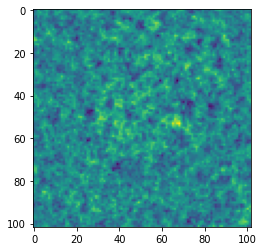

In [12]:
full_data = data[:, 13:115, 13:115] #np.vstack((data,fakes))
plt.imshow(full_data[2])

In [ ]:
dataset = Dataset_Operations(full_data[:4000], metric='l2')
clustering = k_means(40, 100)
clustering.train(dataset, niter=5, init='k++')

In [ ]:
from skimage.util import montage

/usr/local/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
  0%|          | 0/40 [00:00<?, ?it/s]

[1093, 3481, 344, 3924, 2458, 3289, 1722, 2913, 1992, 516, 96, 3529, 1143, 1832, 876, 1042, 1046, 660, 1825, 955, 3052, 3508, 1304, 1386, 1617, 261, 3216, 707, 429, 1136, 3177, 1010, 390, 3567, 1339, 1630, 106, 2502, 1834, 2610]


100%|██████████| 40/40 [2:05:49<00:00, 183.71s/it]  


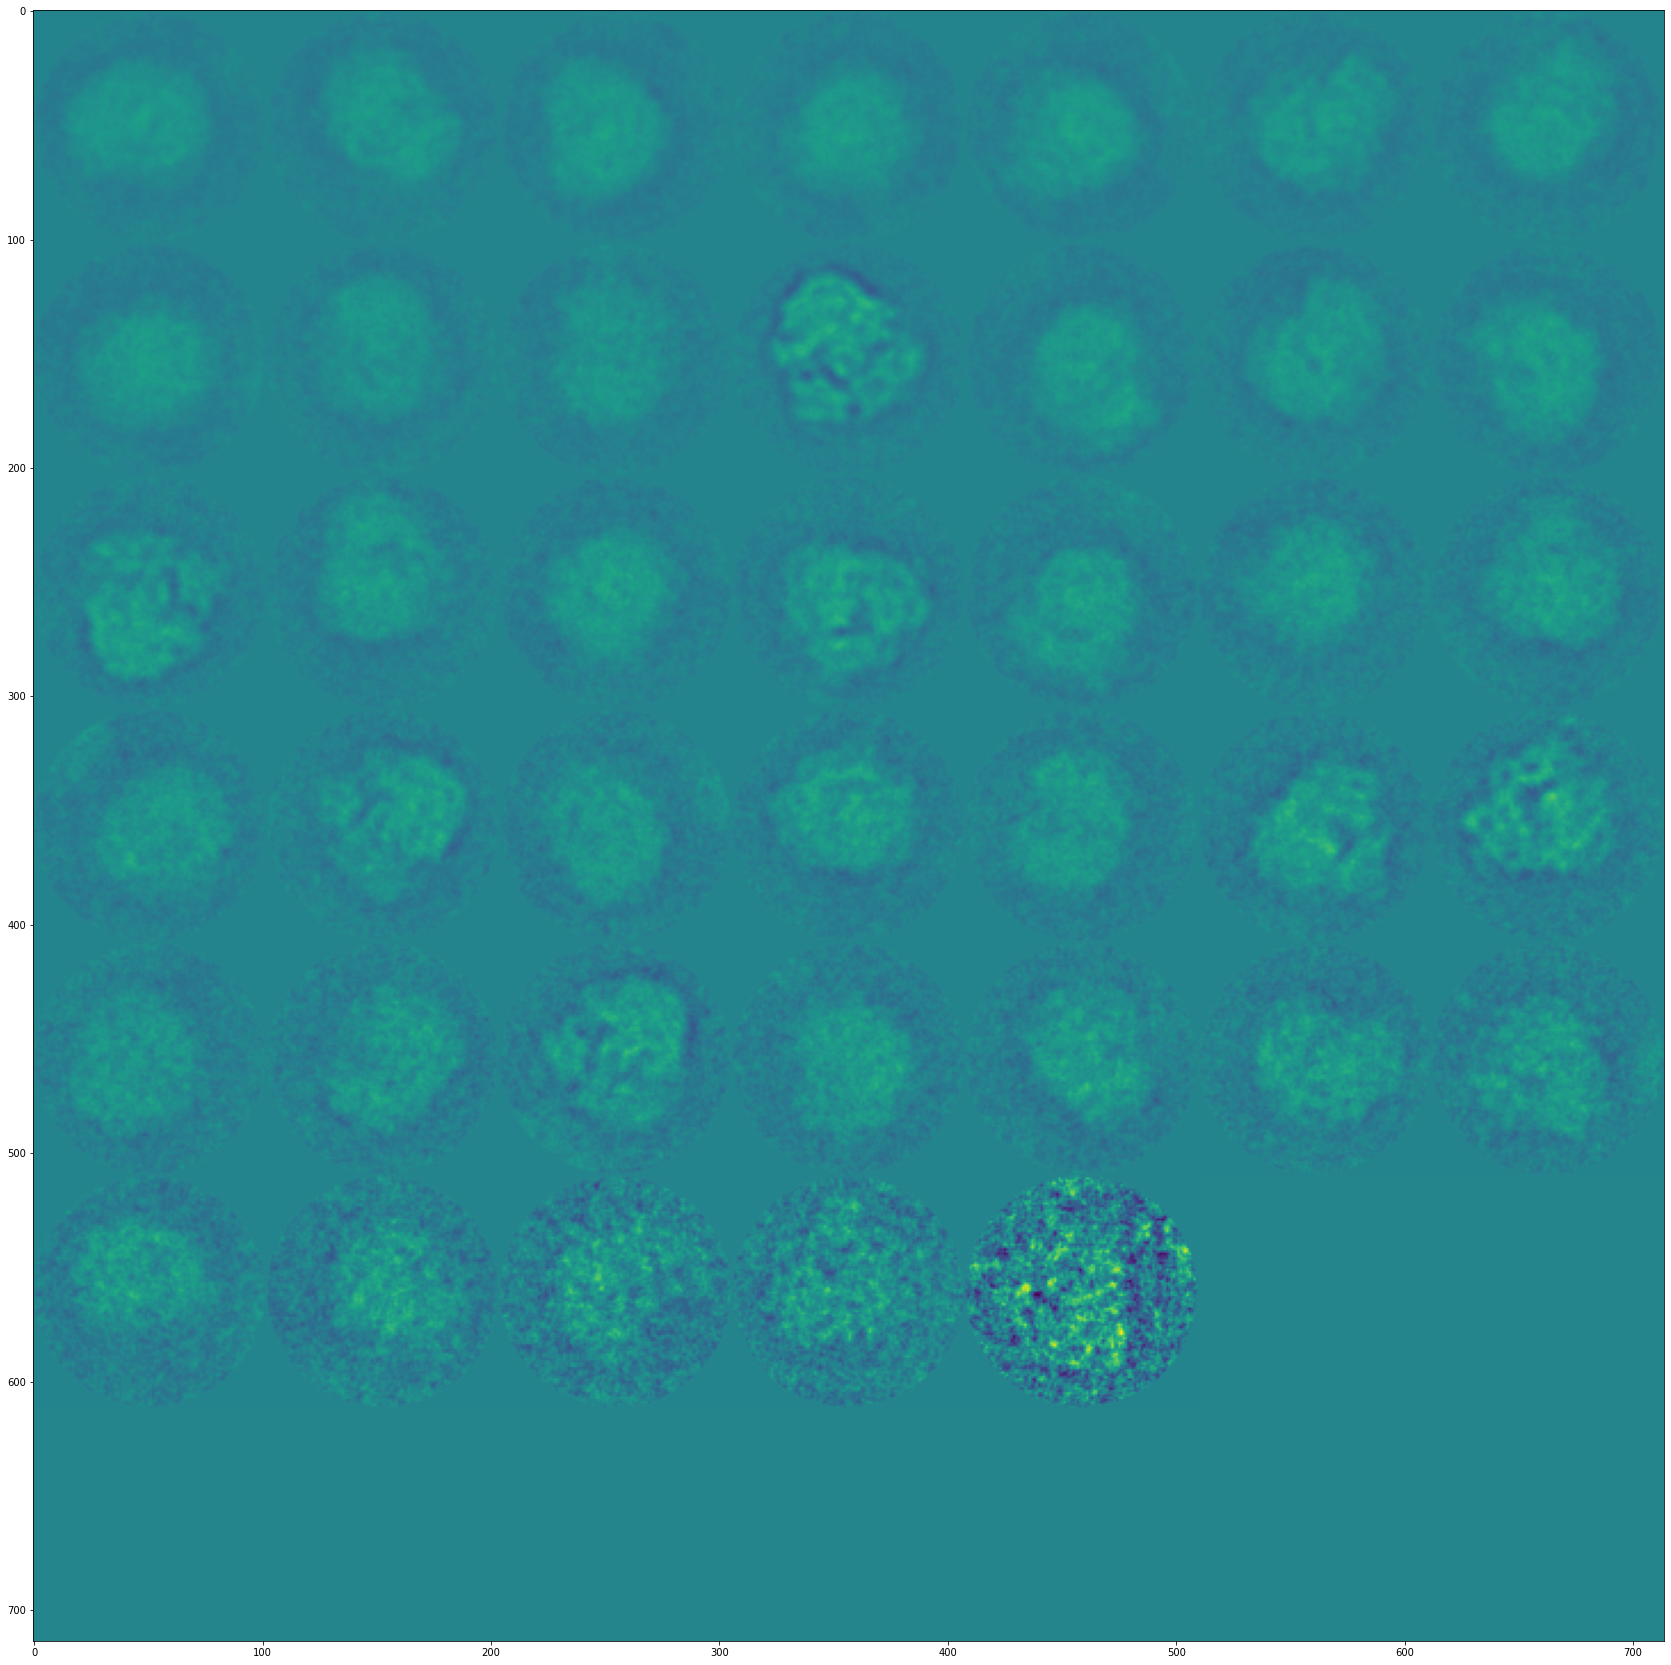

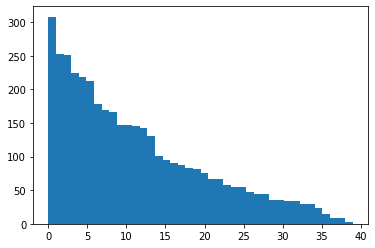

100%|██████████| 40/40 [2:02:17<00:00, 183.16s/it]  


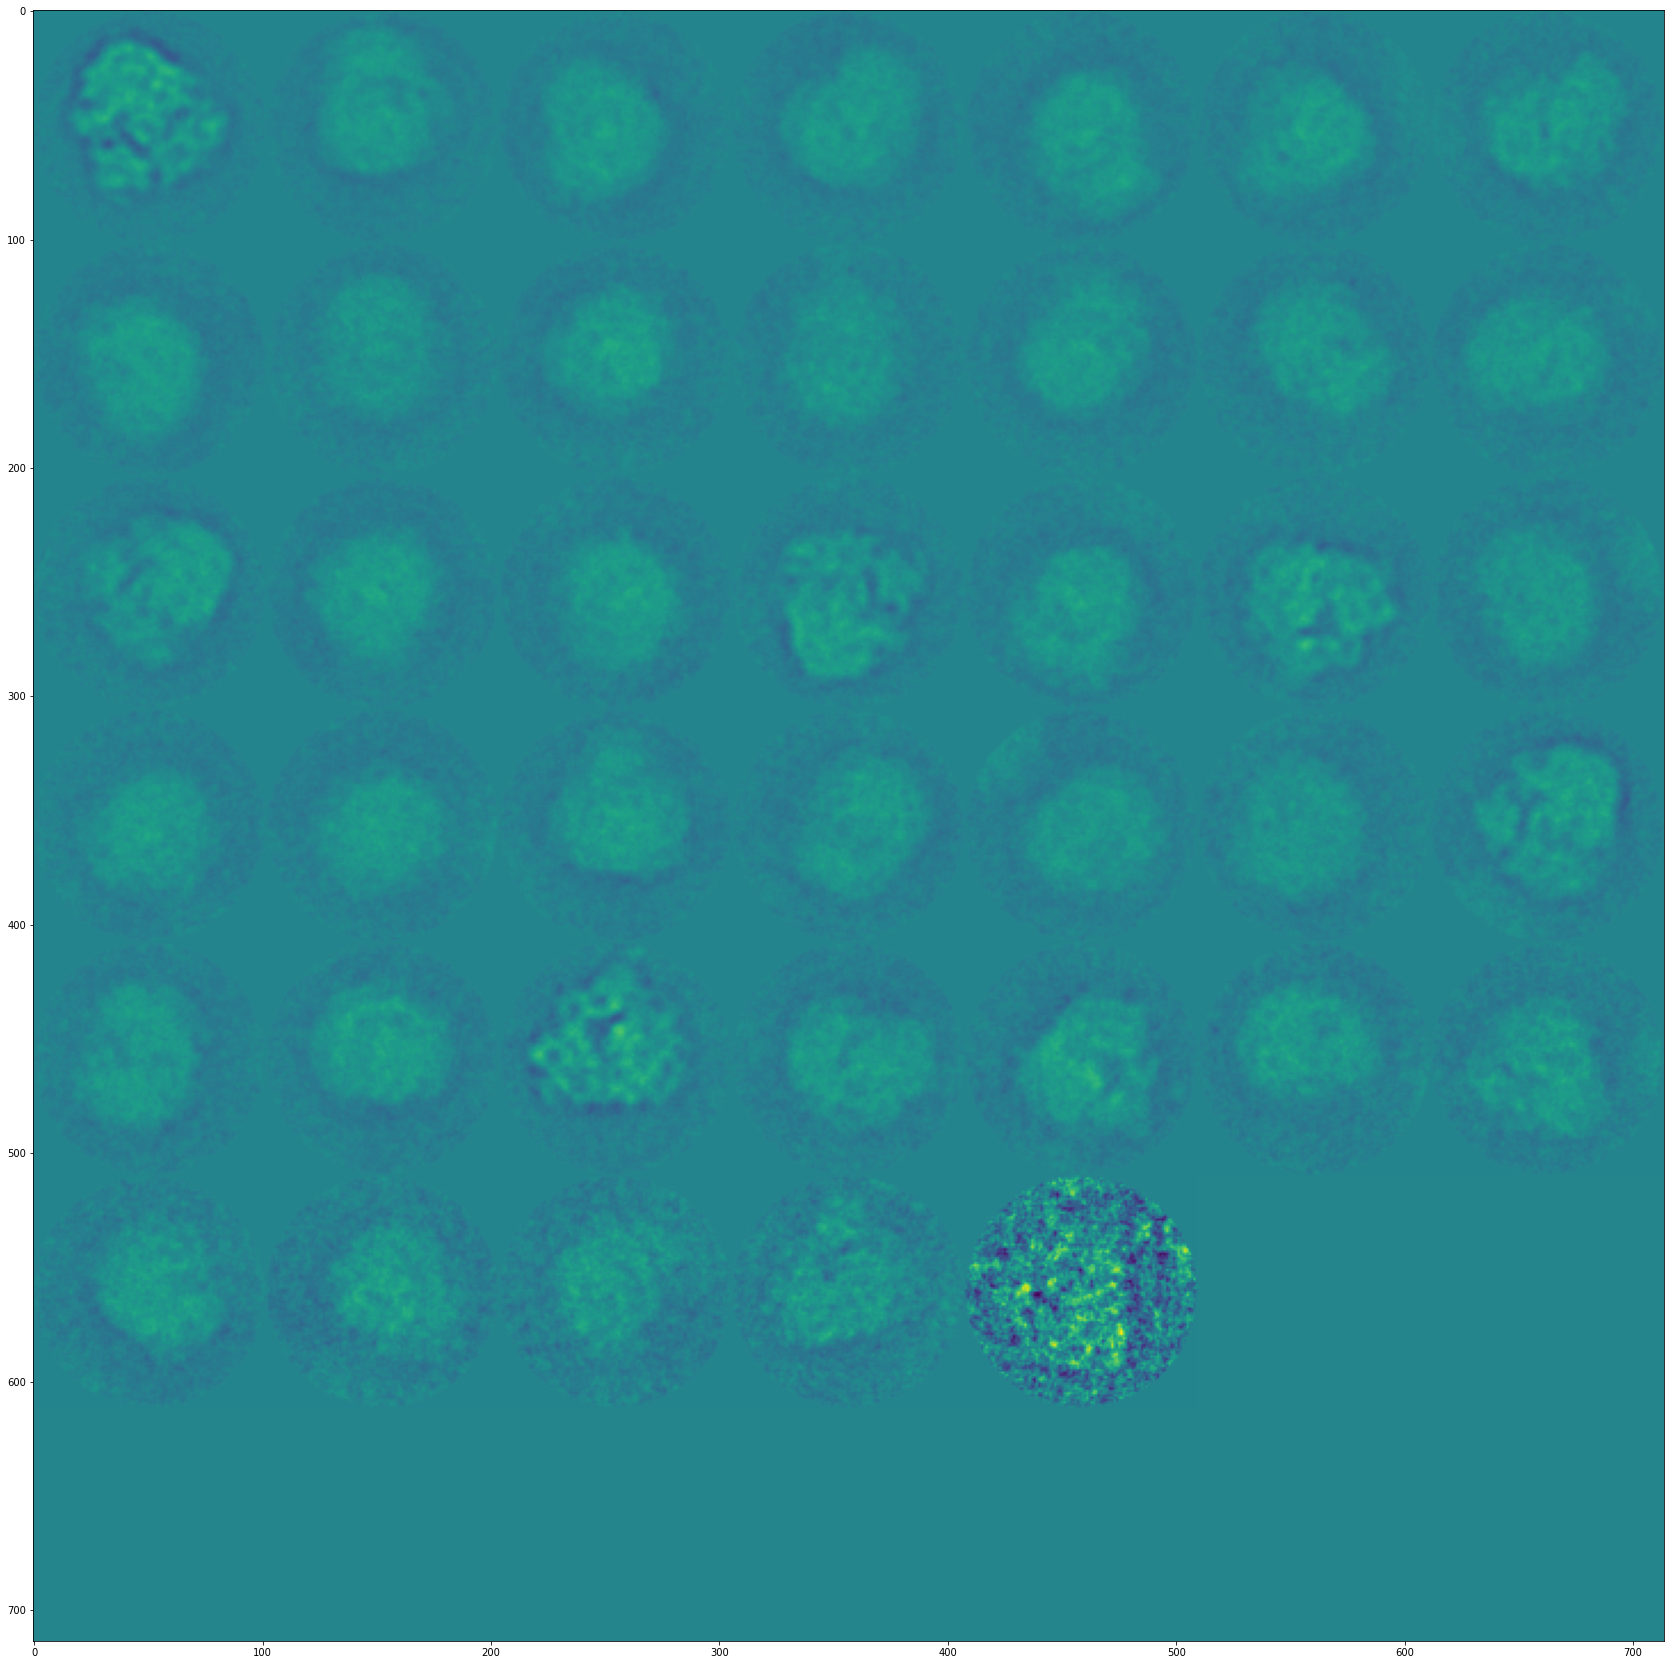

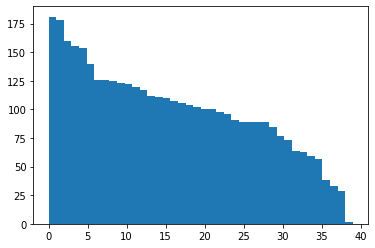

100%|██████████| 40/40 [2:03:10<00:00, 184.93s/it]  


In [13]:
dataset2 = Dataset_Operations(full_data[:4000], metric='wemd', level=6)
clustering2 = k_means(40, 150)
clustering2.train(dataset2,niter=3, init='k++')

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(montage(clustering2.centers))

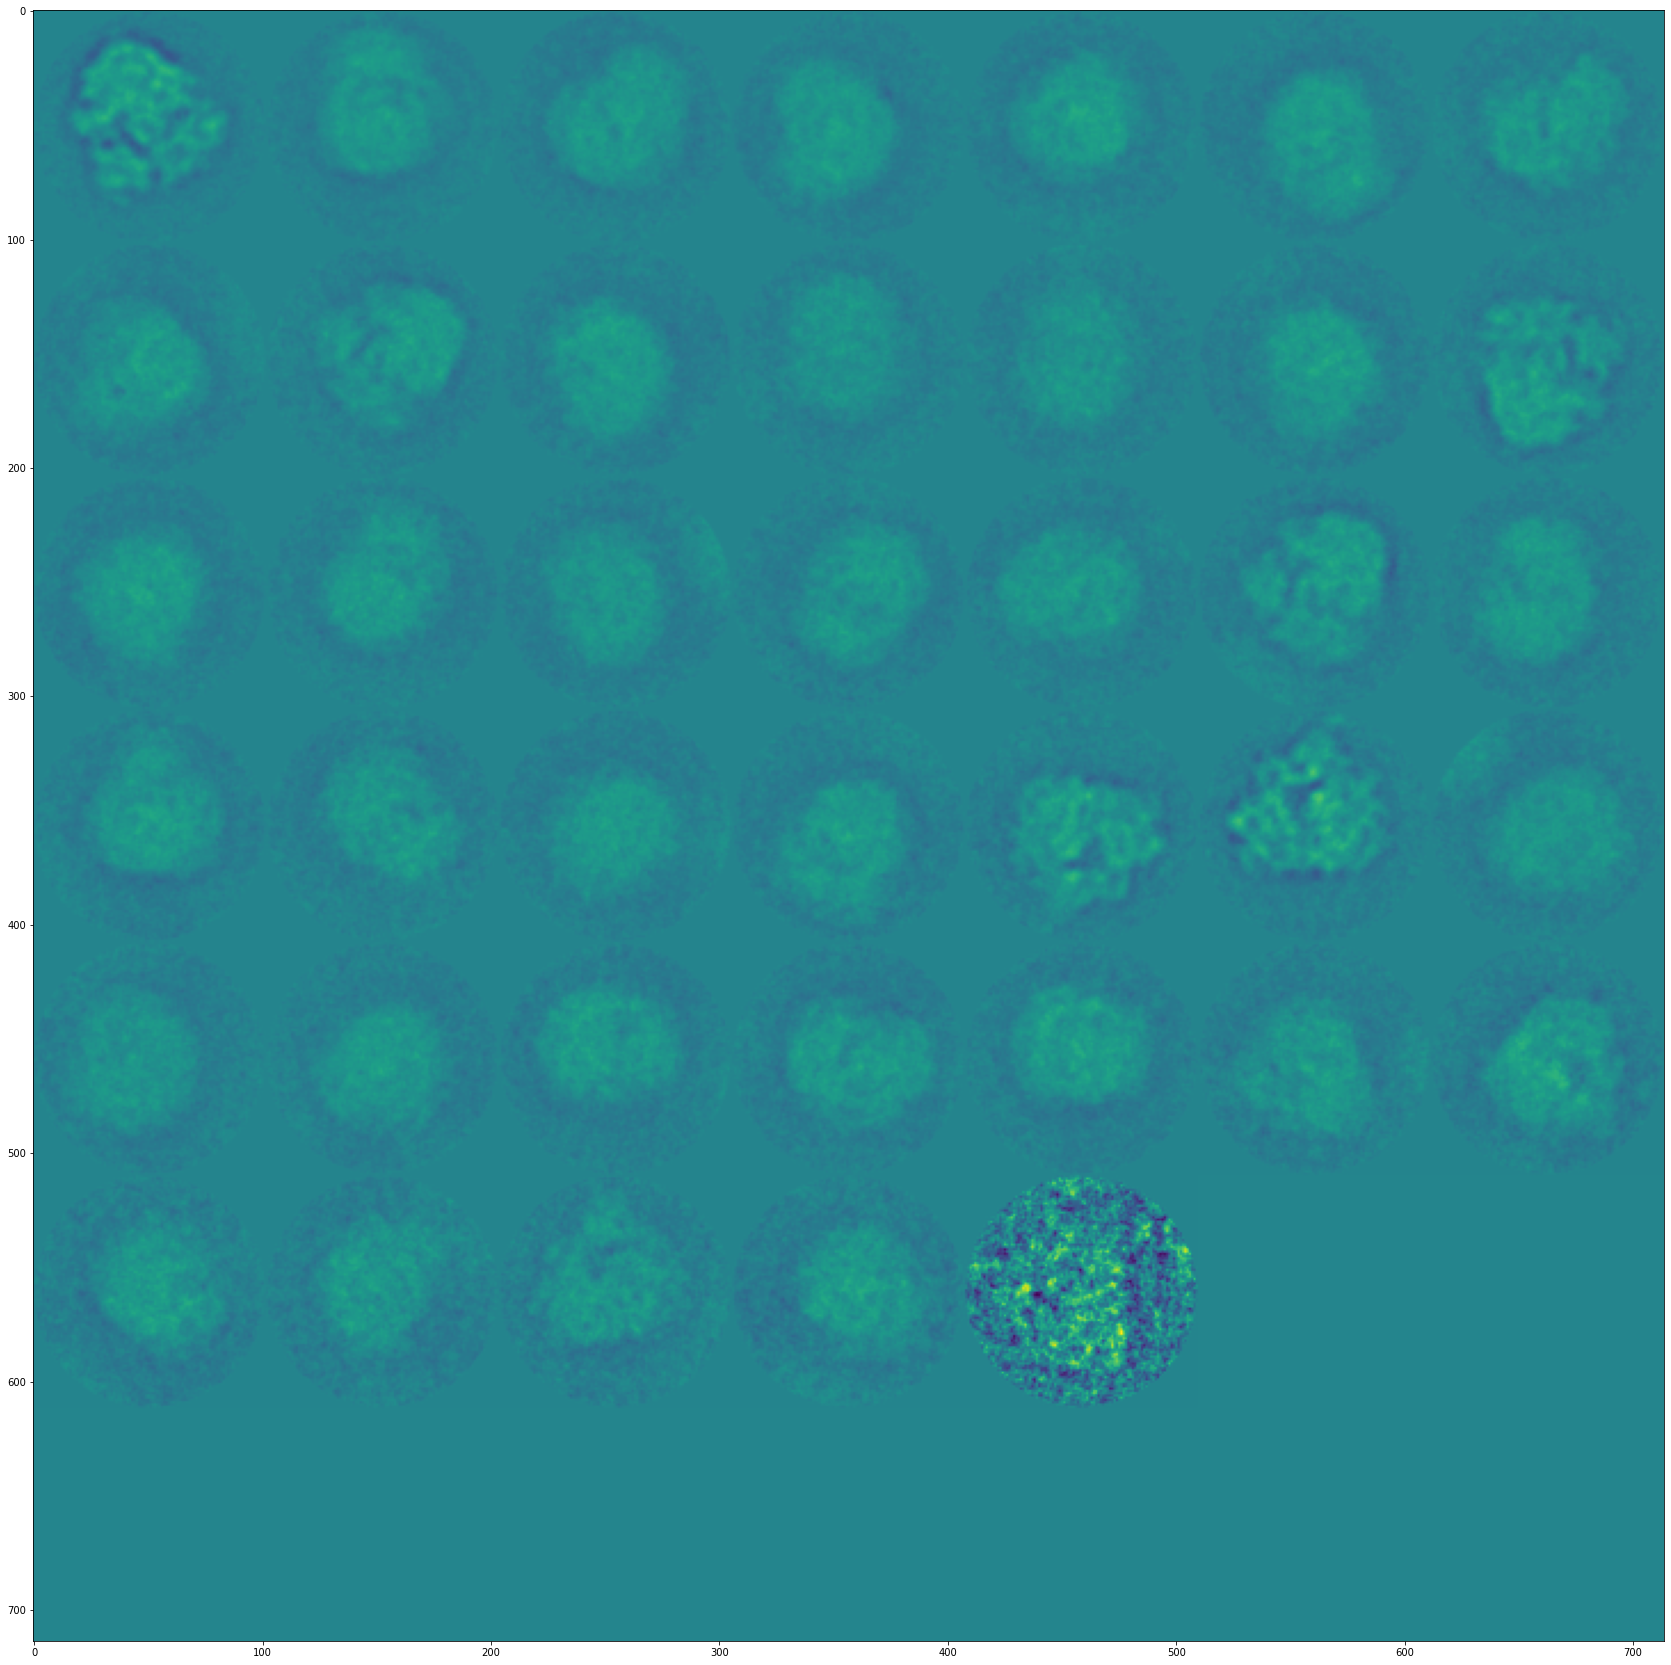

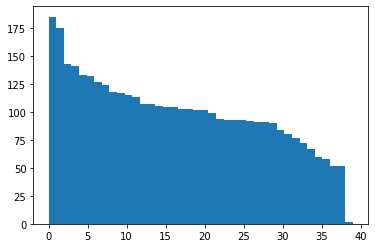

In [14]:
clustering2.view_centers()

In [ ]:
for i in set(clustering.labels[4002:].tolist()):
    print(int(i))

In [ ]:
[int(i) for i in set(clustering2.labels[4002:].tolist())]

In [ ]:
labels = clustering.labels
centers = align_moments(clustering.centers)
counts = dict()
for label in labels:
    counts[label] = counts[label] + 1 if label in counts else 1
counts = [(label, counts[label]) for label in counts]
center_counts = [(centers[int(label[0])], label[1]) for label in counts]
sorted_centers = sorted(center_counts, key=lambda x:x[1], reverse=True)
sorted_centers = [c[0] for c in sorted_centers]
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(montage(np.array(sorted_centers), rescale_intensity=False))
plt.show()
counts = sorted(counts, key=lambda x:x[1], reverse=True)
sorted_labels = np.zeros(len(labels))
for i, entry in enumerate(counts):
    sorted_labels[labels == entry[0]] = i
labels = sorted_labels
noise_labels = labels[4002:]
particle_labels = labels[:4002]
plt.hist([particle_labels, noise_labels],stacked=True, density=True, bins=40)
plt.show()

In [ ]:
idx = np.array([i for i in range(4501)])
cluster = idx[labels == 6]
cluster[cluster <= 4001]

In [ ]:
sorted_centers

In [ ]:
plt.imshow(clustering2.centers[6])

In [ ]:
from scipy import ndimage
cms  = []
for image in data:
    cm = ndimage.measurements.center_of_mass(image)
    cms.append(cm[0])
    cms.append(cm[1])

In [ ]:
idxs = np.array([i for i in range(4000)])[clustering2.labels ==6]

In [ ]:
plt.hist(clustering.labels[idxs], bins=40)

In [ ]:
(clustering2.labels[idxs] == 22).sum()

In [ ]:
set(clustering.labels[idxs].tolist())

In [ ]:
plt.imshow(clustering2.centers[13][30:100,30:100])

In [ ]:
ndimage.measurements.center_of_mass(clustering2.centers[12][30:100,30:100])

In [ ]:
im = clustering.centers[2]
plt.imshow(im)

In [ ]:
im = np.zeros((100,100))
im[25, 25] = 1
plt.imshow(im)

In [ ]:
def align_moments(images):
    images_aligned = []
    for image in images:
        distribution = image/image.sum()
        x_idx = np.array([i for i in range(image.shape[0])]) - 0.5*image.shape[0]
        y_idx = np.array([i for i in range(image.shape[0])]) - 0.5*image.shape[0]
        xx, yy = np.meshgrid(x_idx, y_idx, sparse=True)
        cov_xx = (distribution*xx**2).sum()
        cov_yy = (distribution*yy**2).sum()
        cov_xy = (distribution*xx*yy).sum()
        cov = np.array([[cov_xx, cov_xy],[cov_xy, cov_yy]])
        w, v= np.linalg.eig(cov)
        max_eigenvector = v[:, np.argmax(w)]
        angle = np.arctan(-1*max_eigenvector[0]/max_eigenvector[1]) * (180/np.pi)
        images_aligned.append(ndimage.rotate(image, angle=angle, reshape=False))
    return np.array(images_aligned)
    

In [ ]:
a, b = align_moments([clustering.centers[27], clustering.centers[20]])
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()

In [ ]:
data_copy =  np.load("raw_ribosome_data.npy")

In [ ]:
data_copy = data_copy[:,84:282, 84:282]
data_copy = data_copy + 2
data_copy[data_copy < 0] = 0
data_copy = data_copy/data_copy.sum(axis=2).sum(axis=1).reshape(data_copy.shape[0],1,1)

In [ ]:
plt.imshow(data_copy.sum(axis=0))

In [ ]:
(128/360)*282